In [104]:
import numpy as np
import matplotlib.pyplot as plt
from disba import PhaseDispersion
import pandas as pd
import swprepost

In [105]:
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv("case_7_model_lvl.csv").dropna()

In [107]:
# Frequencies must be sorted starting with high frequencies
gm = swprepost.GroundModel(thickness=df["Thickness [m]"], vp=df["Vp [m/s]"],
                           vs=df["Vs [m/s]"], density=df["Density [kg/m3]"])

frequencies = np.geomspace(500, 0.5, 5000)

# Compute phase disperions
velocity_model = np.empty((gm.nlay, 4), dtype=float)
velocity_model[:, 0] = gm.tk
velocity_model[:, 1] = gm.vp
velocity_model[:, 2] = gm.vs
velocity_model[:, 3] = gm.rh
velocity_model_geo = velocity_model/1000
disp = PhaseDispersion(*velocity_model_geo.T)
period, velocity, *meta = disp(1/frequencies, mode=0, wave="rayleigh")
dc = swprepost.DispersionCurve(1/period, velocity*1000)



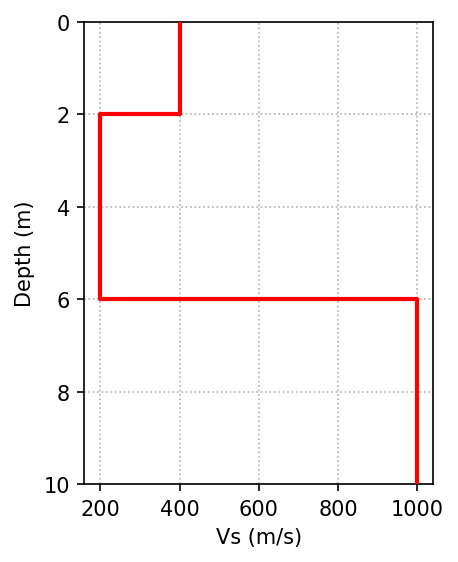

In [108]:
fig, ax = plt.subplots(figsize=(3, 4), dpi=150)
ax.plot(gm.vs2, gm.depth, color="red", lw=2, label="Ground Model", zorder=4)
ax.set_ylabel("Depth (m)")
ax.set_xlabel("Vs (m/s)")
ax.set_ylim(10, 0)

ax.grid(which="both", ls=":")
#ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

In [109]:
gm.depth

[0, 2.0, 2.0, 6.0, 6.0, 9999.0]

In [110]:
gm.vs2

[400.0, 400.0, 200.0, 200.0, 1000.0, 1000.0]

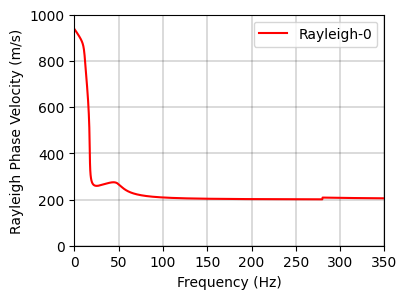

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))

#ax.margins(0.2)
ax.plot(dc.frequency, dc.velocity, color="red", label=f"Rayleigh-0")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Rayleigh Phase Velocity (m/s)")
ax.legend(loc="upper right")
#ax.set_yticks(np.arange(0, max(ylim)+25, 25), minor=True)
ax.grid(axis="both", which="major", color="black", lw=0.2)
ax.grid(axis="both", which="minor", color="black", lw=0.1)
ax.set_xlim(0, 350)
ax.set_ylim(0, 1000)
plt.show()

In [112]:
dc.velocity

array([214.3335734 , 214.378892  , 214.4242106 , ..., 935.16471964,
       935.1689921 , 935.17204386])